# 한국환경공단_전기자동차 충전소 정보_OpenAPI활용가이드_v1.9

In [5]:
# 받아오기
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

url = 'http://apis.data.go.kr/B552584/EvCharger/getChargerInfo'
params ={'serviceKey' : '7eumzmlj6P/ZTK+IX5dLgO1YGg9Q6hU81y6XZO/QPuJQG5qfNZoLn45h9yfsU6FOmU6Z7vISEQORiUc9Cc1c5A==', 
         'pageNo' : '1', 
         'numOfRows' : '9999', 
         'period' : '10',  
         'zscode' : '41460', 
         'dataType' : 'JSON'}

response = requests.get(url, params=params)

In [6]:
# JSON
res = json.loads(response.text)
res['items']['item'][0]

{'statNm': '용인시청',
 'statId': 'ME174147',
 'chgerId': '01',
 'chgerType': '06',
 'addr': '경기도 용인시 처인구 삼가동 556',
 'location': 'null',
 'useTime': '24시간 이용가능',
 'lat': '37.2406659',
 'lng': '127.1773752',
 'busiId': 'ME',
 'bnm': '환경부',
 'busiNm': '환경부',
 'busiCall': '1661-9408',
 'stat': '2',
 'statUpdDt': '20221011145735',
 'lastTsdt': '20221011132408',
 'lastTedt': '20221011140728',
 'nowTsdt': '',
 'powerType': '',
 'output': '50',
 'method': '단독',
 'zcode': '41',
 'zscode': '41460',
 'kind': 'A0',
 'kindDetail': 'A001',
 'parkingFree': 'N',
 'note': '',
 'limitYn': 'N',
 'limitDetail': '',
 'delYn': 'N',
 'delDetail': ''}

In [7]:
# 갯수확인
len(res['items']['item'])

4457

In [8]:
# 데이타프레임 변환
df = pd.DataFrame(res['items']['item'])
df.head()

,statNm,statId,chgerId,chgerType,addr,location,useTime,lat,lng,busiId,...,zcode,zscode,kind,kindDetail,parkingFree,note,limitYn,limitDetail,delYn,delDetail
0,용인시청,ME174147,01,06,경기도 용인시 처인구 삼가동 556,null,24시간 이용가능,37.2406659,127.1773752,ME,...,41,41460,A0,A001,N,,N,,N,
1,포곡읍사무소,ME174148,01,06,경기도 용인시 처인구 포곡읍 포곡로 258,null,24시간 이용가능,37.2781004,127.2312587,ME,...,41,41460,A0,A002,N,,N,,N,
2,죽전휴게소(서울방향),ME178002,01,06,경기도 용인시 수지구 경부고속도로 400 (죽전동),null,24시간 이용가능,37.3320728,127.1048475,ME,...,41,41460,C0,C001,Y,,N,,N,
3,죽전휴게소(서울방향),ME178002,02,06,경기도 용인시 수지구 경부고속도로 400 (죽전동),null,24시간 이용가능,37.3320728,127.1048475,ME,...,41,41460,C0,C001,Y,,N,,N,
4,기흥휴게소(부산방향),ME178003,01,06,경기도 용인시 기흥구 공세로 173 (공세동),null,24시간 이용가능,37.2356557,127.105021,ME,...,41,41460,C0,C001,Y,,N,,N,


In [9]:
# 컬럼명 수정(명세표 참고)
a = ["충전소명","충전소ID","충전기ID","충전기타입","주소","상세위치","이용가능시간","위도","경도","기관 아이디","기관명","운영기관명","운영기관연락처","충전기상태","상태갱신일시","마지막 충전시작일시","마지막 충전종료일시","충전중 시작일시","파워타입", "충전용량","충전방식","지역코드","지역구분 상세 코드","충전소 구분 코드","충전소 구분 상세코드","주차료무료","충전소 안내","이용자 제한","이용제한 사유","삭제 여부","삭제 사유"]
df.columns = a
df

,충전소명,충전소ID,충전기ID,충전기타입,주소,상세위치,이용가능시간,위도,경도,기관 아이디,...,지역코드,지역구분 상세 코드,충전소 구분 코드,충전소 구분 상세코드,주차료무료,충전소 안내,이용자 제한,이용제한 사유,삭제 여부,삭제 사유
0,용인시청,ME174147,01,06,경기도 용인시 처인구 삼가동 556,null,24시간 이용가능,37.2406659,127.1773752,ME,...,41,41460,A0,A001,N,,N,,N,
1,포곡읍사무소,ME174148,01,06,경기도 용인시 처인구 포곡읍 포곡로 258,null,24시간 이용가능,37.2781004,127.2312587,ME,...,41,41460,A0,A002,N,,N,,N,
2,죽전휴게소(서울방향),ME178002,01,06,경기도 용인시 수지구 경부고속도로 400 (죽전동),null,24시간 이용가능,37.3320728,127.1048475,ME,...,41,41460,C0,C001,Y,,N,,N,
3,죽전휴게소(서울방향),ME178002,02,06,경기도 용인시 수지구 경부고속도로 400 (죽전동),null,24시간 이용가능,37.3320728,127.1048475,ME,...,41,41460,C0,C001,Y,,N,,N,
4,기흥휴게소(부산방향),ME178003,01,06,경기도 용인시 기흥구 공세로 173 (공세동),null,24시간 이용가능,37.2356557,127.105021,ME,...,41,41460,C0,C001,Y,,N,,N,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,삼천리 에버랜드 복합충전소(급속),TDH99001,01,06,경기도 용인시 처인구 포곡읍 곡현로 74,주차장 전기차 충전소,24시간 이용가능,37.2932724,127.2226093,TD,...,41,41460,B0,B002,N,,N,,N,
4453,삼천리 에버랜드 복합충전소(급속),TDH99001,02,06,경기도 용인시 처인구 포곡읍 곡현로 74,주차장 전기차 충전소,24시간 이용가능,37.2932724,127.2226093,TD,...,41,41460,B0,B002,N,,N,,N,
4454,삼천리 에버랜드 복합충전소(급속),TDH99001,03,06,경기도 용인시 처인구 포곡읍 곡현로 74,주차장 전기차 충전소,24시간 이용가능,37.2932724,127.2226093,TD,...,41,41460,B0,B002,N,,N,,N,
4455,삼천리 에버랜드 복합충전소(급속),TDH99001,04,06,경기도 용인시 처인구 포곡읍 곡현로 74,주차장 전기차 충전소,24시간 이용가능,37.2932724,127.2226093,TD,...,41,41460,B0,B002,N,,N,,N,


---
# 컬럼 순서 오기 수정

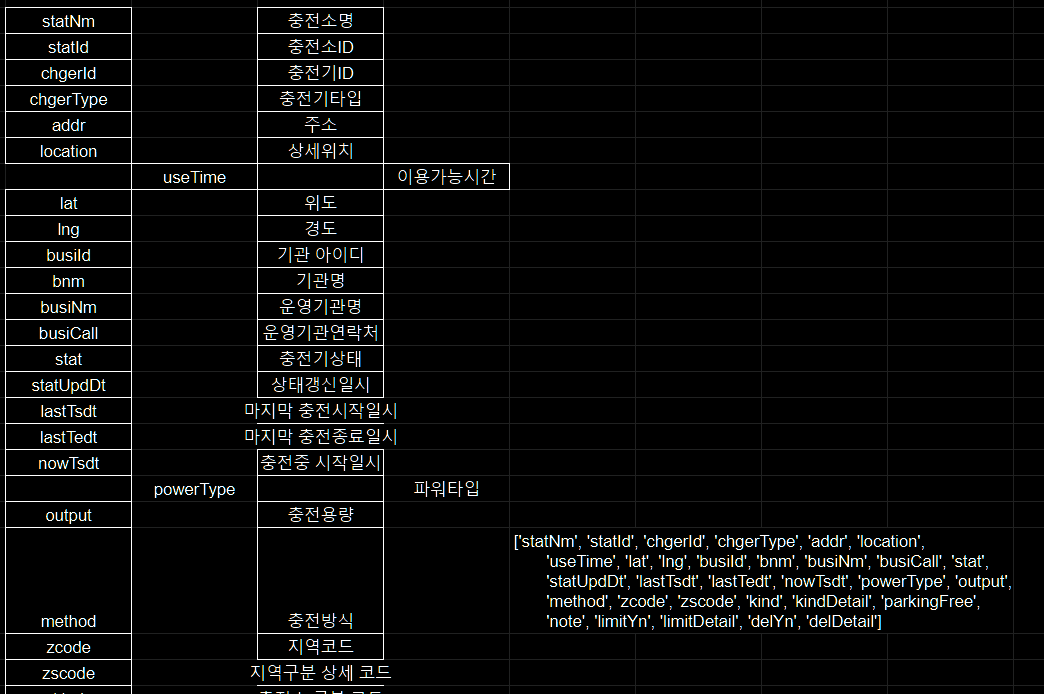

---

In [10]:
df.columns

Index(['충전소명', '충전소ID', '충전기ID', '충전기타입', '주소', '상세위치', '이용가능시간', '위도', '경도',
       '기관 아이디', '기관명', '운영기관명', '운영기관연락처', '충전기상태', '상태갱신일시', '마지막 충전시작일시',
       '마지막 충전종료일시', '충전중 시작일시', '파워타입', '충전용량', '충전방식', '지역코드', '지역구분 상세 코드',
       '충전소 구분 코드', '충전소 구분 상세코드', '주차료무료', '충전소 안내', '이용자 제한', '이용제한 사유',
       '삭제 여부', '삭제 사유'],
      dtype='object')

In [11]:
# 저장
df.to_csv('./yong_elec.csv')